<a href="https://colab.research.google.com/github/JeelTikiwala/Machine-Learning-for-Kyphosis-Disease-Classification/blob/main/Machine_Learning_for_Kyphosis_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and datasets

In [5]:
pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00


In [6]:
import pandas as pd #data frame manipulation
import numpy as np #numercial analysis and arrays manipulation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #advanced data visualization

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [9]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [10]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [13]:
kyphosis_df.tail(7) #last 7 rows from the csv

,Kyphosis,Age,Number,Start
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [11]:
kyphosis_df.info() #summary of the data from the csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [12]:
kyphosis_df['Age'].mean() /12 #average age of the patients in years


6.97119341563786

In [13]:
kyphosis_df['Age'].min() /12 #minimum age of the patients in years

0.08333333333333333

In [14]:
kyphosis_df['Age'].max() /12 #maximum age of the patients in years

17.166666666666668

In [15]:
kyphosis_df.describe() #summary of the data from the csv

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


Perform Data Visualtization

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [17]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [21]:
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis'] == 1]
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis'] == 0]

In [22]:
print ('Disease present after opertaion percentage =' , (len(kyphosis_True)/len(kyphosis_df))*100 , "%")
# print ('Disease not present after opertaion percentage =' , (len(kyphosis_False)/len(kyphosis_df))*100, "%")

Disease present after opertaion percentage = 20.98765432098765 %


<Axes: >

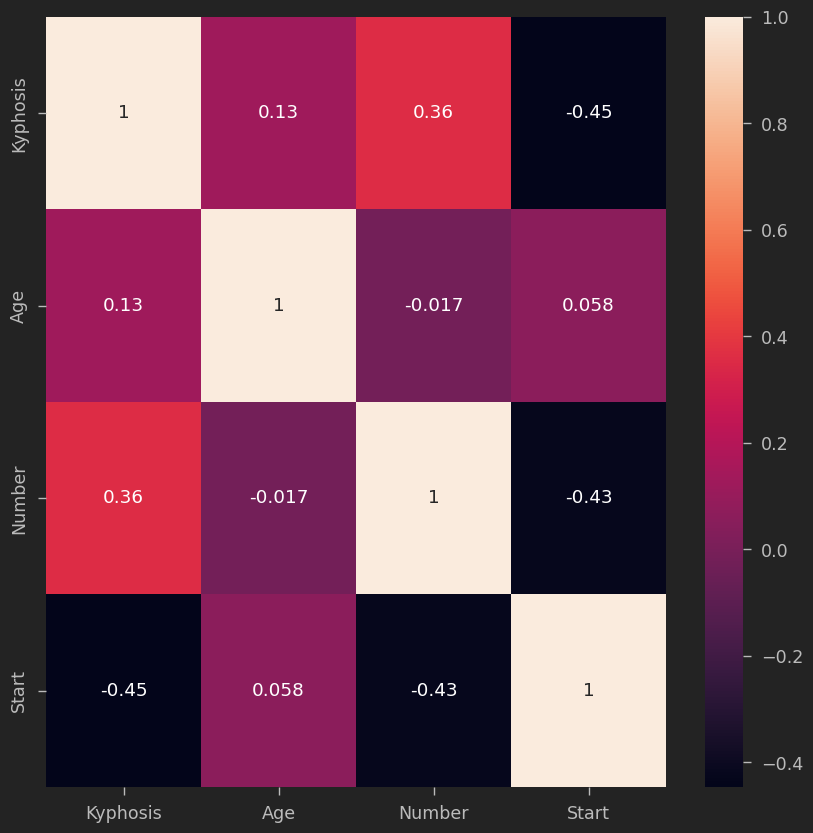

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(kyphosis_df.corr(), annot=True)

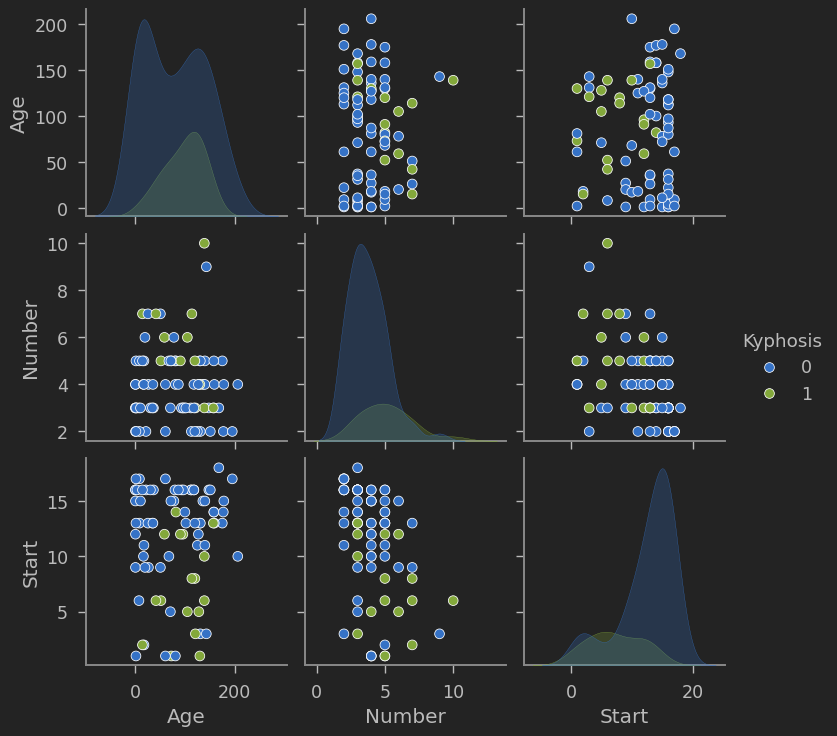

In [24]:
sns.pairplot(kyphosis_df, hue='Kyphosis')

<Axes: xlabel='Kyphosis', ylabel='count'>

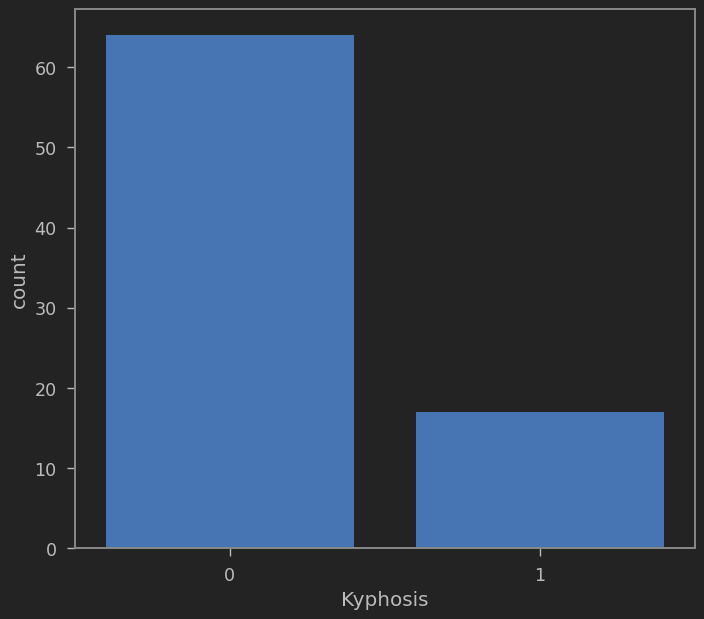

In [25]:
# countplot showing how many samples belong to each class

sns.countplot(x='Kyphosis', data=kyphosis_df)


In [18]:
x = kyphosis_df.drop('Kyphosis', axis=1)
y = kyphosis_df['Kyphosis']

In [31]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [32]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split #80% training 20% testing

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [21]:
x_train.shape

(56, 3)

In [37]:
x_test.shape

(25, 3)

logistic regression
linear equation: y = b0 + b1 * x
Apply sigmoid function: P(x) = sigmoid(y)
P(x) = 1/ 1+ e^-y

In [22]:
x_train.shape

(56, 3)

In [23]:
y_train.shape

(56,)

In [24]:
x_test.shape

(25, 3)

In [25]:
y_test.shape

(25,)

In [27]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

<Axes: >

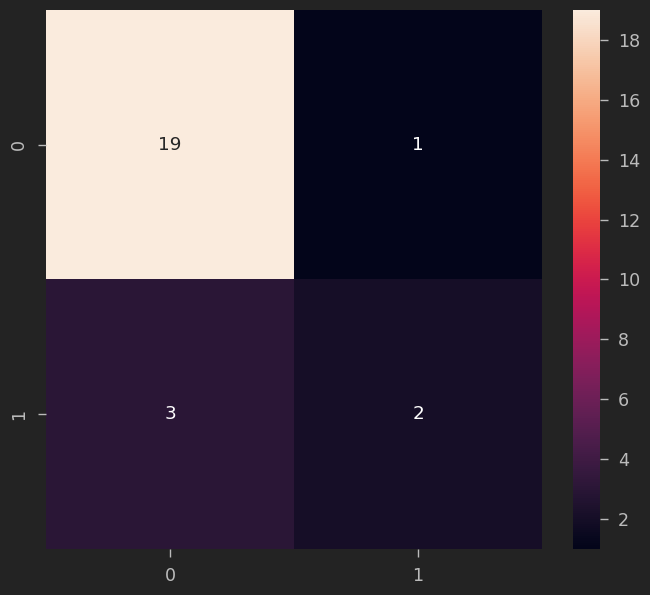

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25

